In [191]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [210]:
white = pd.read_csv("winequality-white.csv",sep = ";")
red = pd.read_csv("winequality-red.csv",sep = ";")

In [211]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [194]:
white.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
4             7.2              0.23         0.32            8.50      0.058   
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
4                  47.0                 186.0   0.9956  3.19       0.40   
5                  30.0                  97.0   0.9951  3.26       0.44   
6                  30.0                 136.0   0.9949  3.18       0.47   
7                  45.0                 170.0   1.0010  3.00       0.45   
8                  14.0                 132.0   0.9940  3.30       0.49   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   

    alcohol  quality  
0       8.8        6  
1       9.5        6  
2      10.1        6  
3       9.9        6  
4       9.9        6  
5      10.1        6  
6       9.6        6  
7       8.8        6  
8       9.5        6  
9      11.0        6  
10     12.0        5  
11      9.7        5  
12     10.8        5  
13     12.4        7  
14      9.7        5

In [195]:
for clm in white.columns:
    print("Unique values in ",clm , white[clm].nunique())

Unique values in  fixed acidity 68
Unique values in  volatile acidity 125
Unique values in  citric acid 87
Unique values in  residual sugar 310
Unique values in  chlorides 160
Unique values in  free sulfur dioxide 132
Unique values in  total sulfur dioxide 251
Unique values in  density 890
Unique values in  pH 103
Unique values in  sulphates 79
Unique values in  alcohol 103
Unique values in  quality 7


## Before diving into EDA I would like to study about the process of wine making and how these features come into play:

#### About the data set in general:

Description of attributes:  

1. **Fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  
2. **Volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  
3. **Citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines  
4. **Residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet  
5. **Chlorides**: the amount of salt in the wine  
6. **Free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine  
7. **Total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine  
8. **Density**: the density of wine is close to that of water depending on the percent alcohol and sugar content 
9. **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale  
10. **Sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant  
11. **Alcohol**: the percent alcohol content of the wine  
12. **Quality**: output variable (based on sensory data, score between 0 and 10)  



##### Acidity
* Acids are one of 4 fundamental traits in wine (the others are tannin, alcohol, and sweetness). Acidity gives a wine its tart and sour taste. Fundamentally speaking, all wines lie on the acidic side of the pH spectrum, and most range from 2.5 to about 4.5 pH.

<img src="acidity-in-wine-chart.jpg">

* Acidity is a measurement of the quantity of acid present in a wine or must. This is not to be confused with the pH of a wine which is a measurement of the strength of those acids present.

* Fixed/Titratable acidity or erroneously total acidity, is a measurement of the total concentration of titratable acids and free hydrogen ions present in your wine.What makes an acid titratable is its ability to be neutralized by adding a base, a laboratory process called titration. To measure this you would take a sample of wine and add to it a reagent, or indicator, which is a chemical that changes color when a specific pH is reached.

* Volatile acids must be quantified using a steam distillation process. In this a sample of wine is exposed to steam which in turn encourages the volatile acids to leave the wine.The steam and the acids that leave the wine sample are then collected through condensation in another container. After a specific quantity of water and acids has been collected that mixture is then tested to determine the concentration of volatile acids.  Volatile acids are produced through microbial action such as yeast fermentation, malolactic fermentation, and other fermentations carried out by spoilage organisms.The presence of volatile acids in any appreciable quantity is a sign of spoilage other than citric, acetic or lactic acid. Acetic acid is produced by acetobacter as it ferments your nice fine wine into vinegar.Keep their concentrations as low as possible.

* When you and I have a glass of wine our mouth is largely unable to tell the difference between titratable and volatile acids. If there is an overwhelming quantity of any single acid, say citric, we may be able to pick out their contribution to the wine. In the case of citric acid your wine may have citrus overtones to it. An over abundance of a volatile spoilage acid can relate off flavors and aromas to us. But even so it must be out of balance for us to notice this one particular acid.

##### Residual Sugar
* Residual Sugar (or RS) is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes. It’s measured in grams per liter.

##### Sulphurs
* Sulfur Dioxide (SO2) is the most common chemical compound used in winemaking. Its preservative and anti-bacterial qualities were discovered thousands of years ago, and because it is non-toxic it has been used in foods and wine since antiquity.Sulfur is naturally present on the grape skins, and though it is typically not enough for ensure against spoilage for winemaking purposes, it means that no wine is entirely sulfite-free.

* SO2 is added periodically throughout the winemaking process and plays a critical role in quality winemaking. Sulfur serves two main purposes. It prevents the wine from reacting with oxygen which can cause browning and off-odors (oxidation), and it inhibits the growth of bacteria and undesirable wild yeasts in the grape juice and wine.

* Wines with lower acidity need more sulfites than higher acidity wines. At pH 3.6 and above, wines are much less stable, and sulfites are necessary for shelf-life.
* Wines with more color (i.e., red wines) tend to need less sulfites than clear wines (i.e., white wines). A typical dry white wine may have around 100 mg/L whereas a typical dry red wine will have around 50–75 mg/L.
* Wines with higher sugar content tend to need more sulfites to prevent secondary fermentation of the remaining sugar.
* Wines that are warmer release free sulfur compounds (the nasty sulfur smell) and can be “fixed” through decanting and chilling the wine.


#### Recommended links
1- [Wine Acidity](https://winemakersacademy.com/understanding-wine-acidity/)
2- [Sulphor content in wine](https://winefolly.com/deep-dive/sulfites-in-wine/)
3- [Residual Sugar](https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/#:~:text=Residual%20Sugar%20(or%20RS)%20is,5%20ounces%20%2F%20150%20ml)

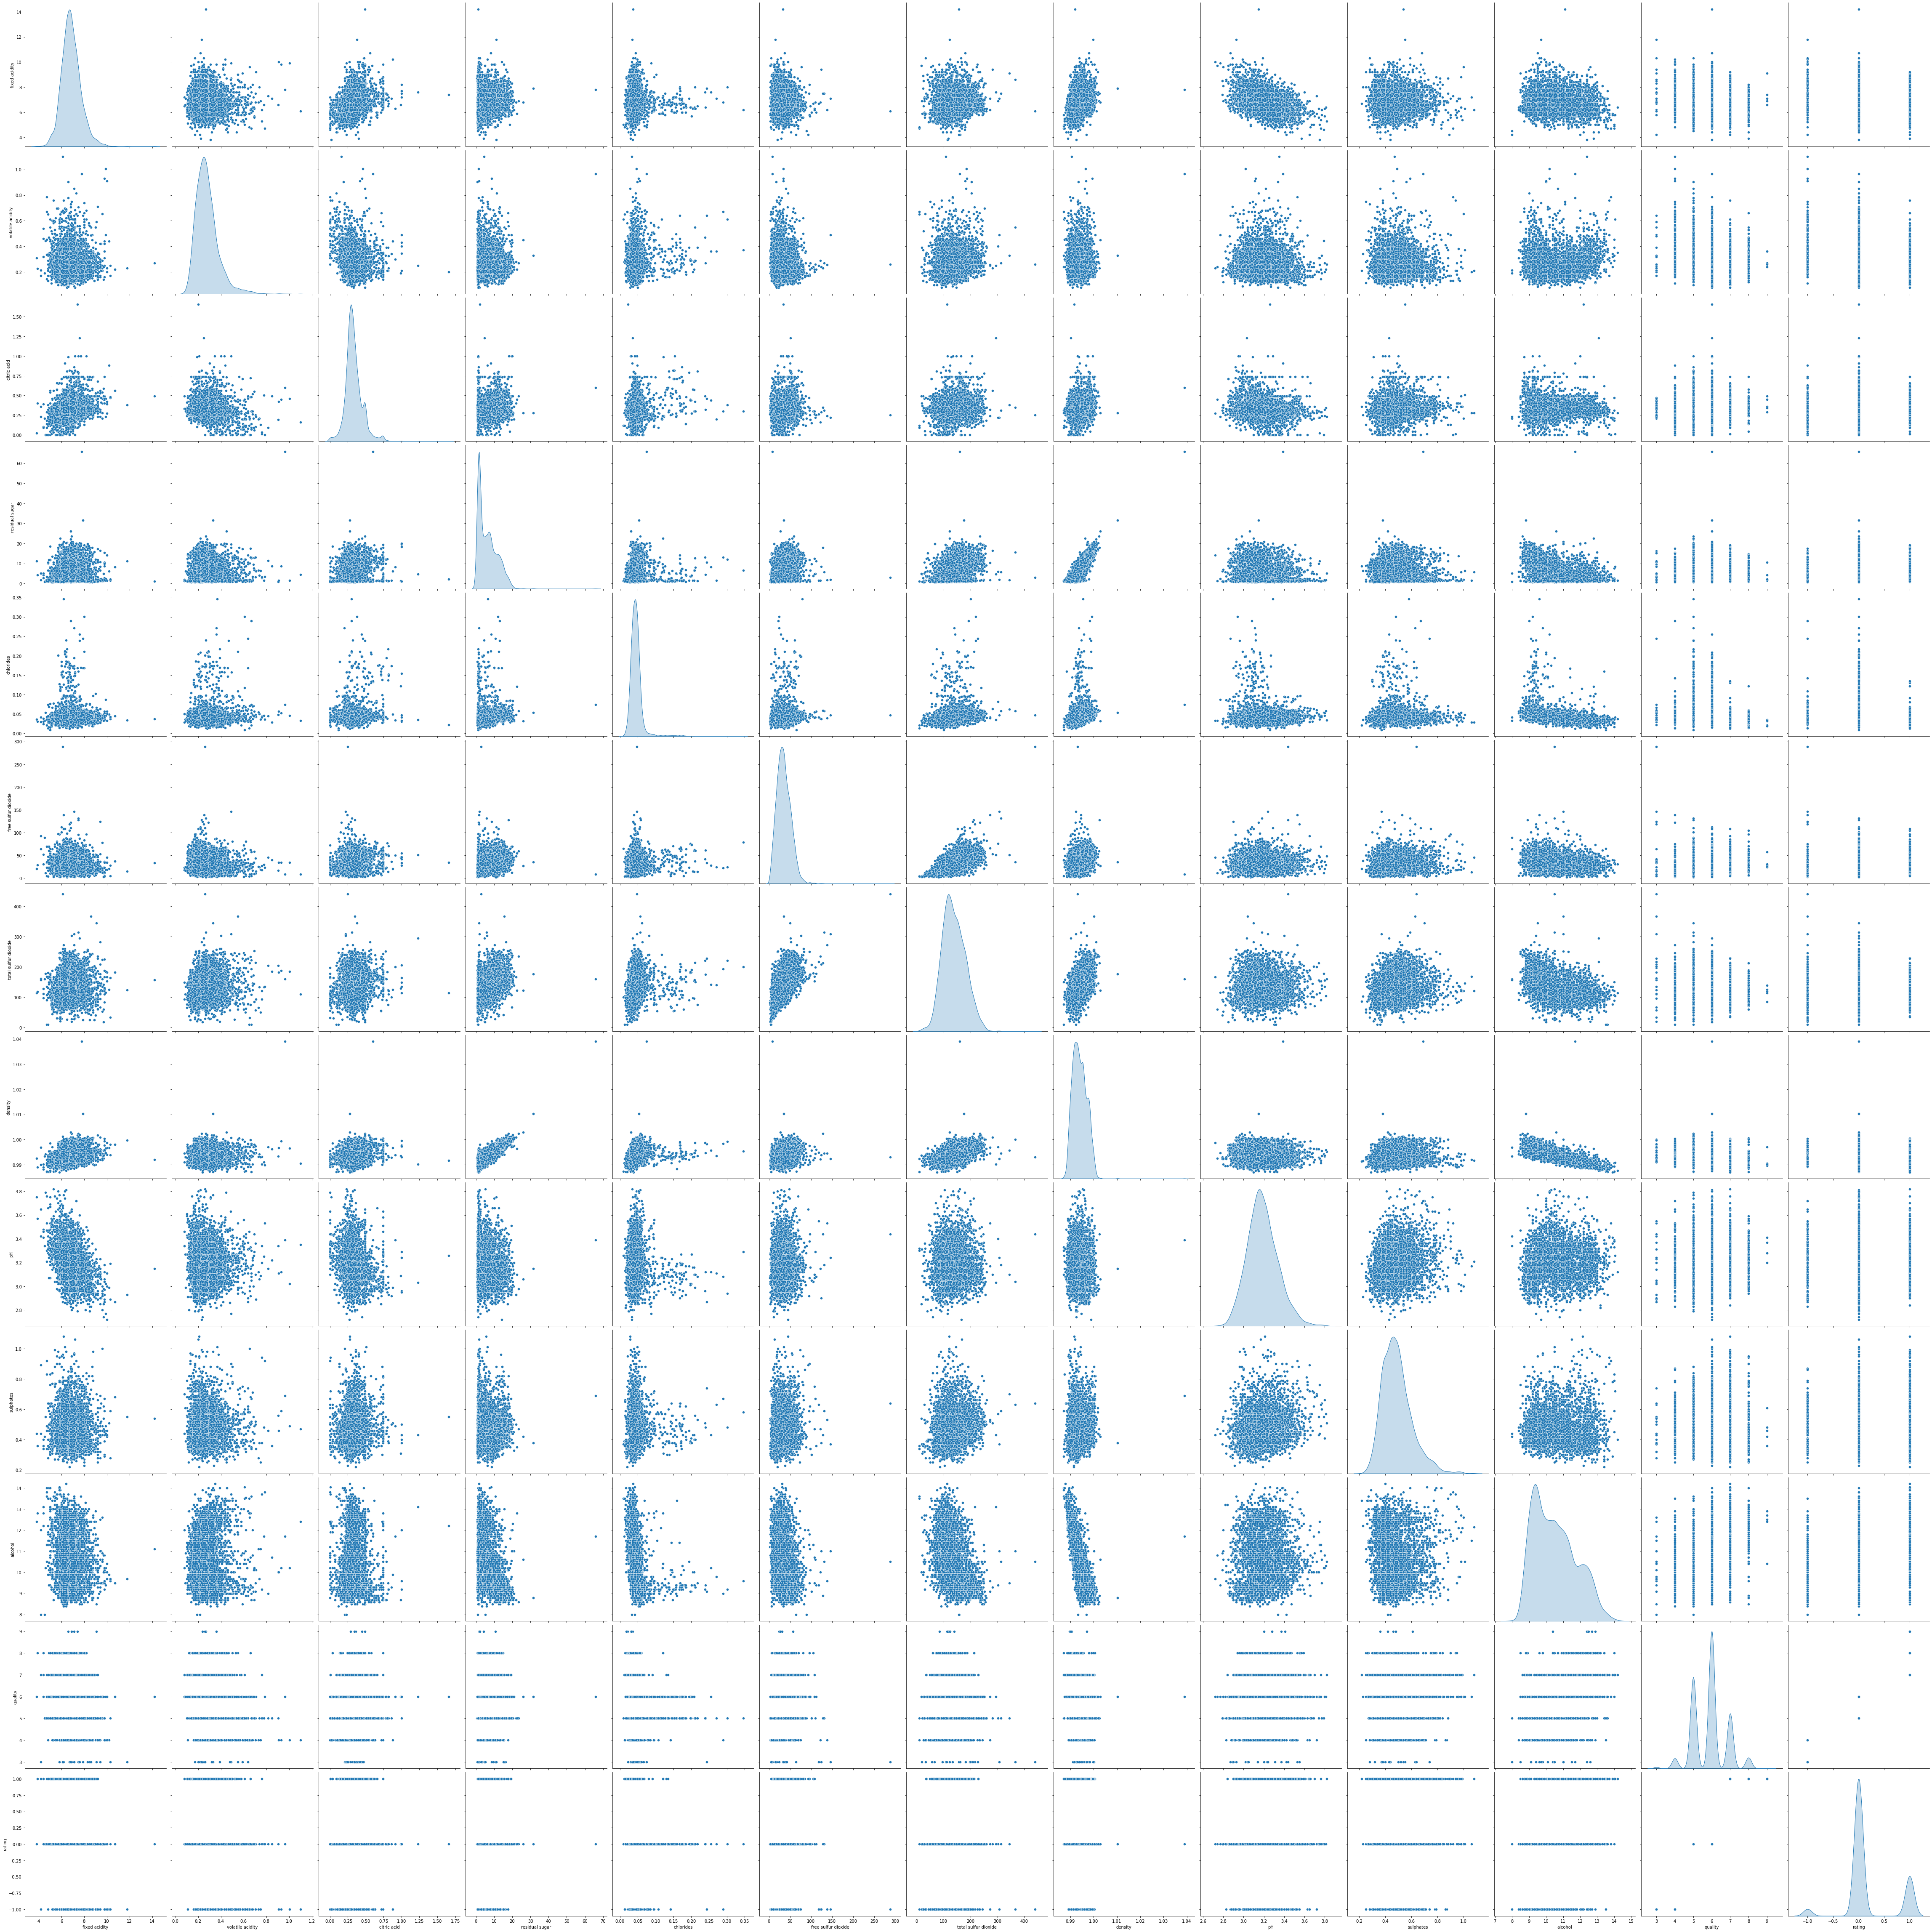

In [253]:
sb.pairplot(white,diag_kind = 'kde', height=5)

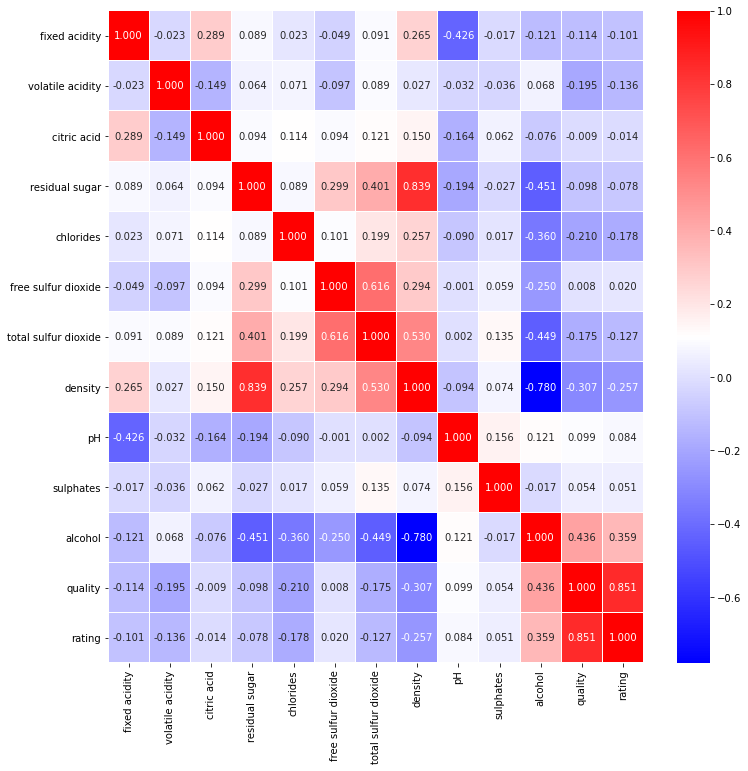

In [254]:
plt.figure(figsize=(12,12))
hm = sb.heatmap(white.corr(),cmap="bwr",annot=True,fmt='.3f',linewidths=.05)

Positive correlations- 

1. Density and residual sugar 0.839
2. Quality and alcohol content 0.436
3. Density and Total sulfur content 0.401
4. Total and free sulfur dioxide 0.616

Quality and rating ofcourse lol !


Negative correlations-

1. Density and alcohol content -0.780
2. Alcohol content and residual sugar -0.451
3. Alcohol content and total sulfur content -0.449
4. pH and fixed acidity -0.426

In [255]:
correlation = white.corr()
print(correlation['quality'].sort_values(ascending = False))

quality                 1.000000
rating                  0.851016
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


In [138]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [212]:
condition = [(white['quality']<=4),(white['quality']>=7)]
rating = [-1, 1]
white["rating"] = np.select(condition,rating, default = 0)
white.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  rating  
0      8.8        6       0  
1      9.5        6       0  
2     10.1        6       0  
3      9.9        6       0  
4      9.9        6       0  
5     10.1        6       0  
6      9.6        6       0  
7      8.8        6       0  
8      9.5        6       0  
9     11.0        6       0

In [220]:
white.groupby('rating').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
rating                                                                 
-1           7.180874          0.375984     0.307705        4.821038   
 0           6.876060          0.277086     0.337877        6.797729   
 1           6.725142          0.265349     0.326057        5.261509   

        chlorides  free sulfur dioxide  total sulfur dioxide   density  \
rating                                                                   
-1       0.050557            26.633880            130.232240  0.994343   
 0       0.047740            35.962107            142.571272  0.994480   
 1       0.038160            34.550472            125.245283  0.992412   

              pH  sulphates    alcohol   quality  
rating                                            
-1      3.183388   0.475956  10.173497  3.890710  
 0      3.180720   0.487557  10.269808  5.601368  
 1      3.215132   0.500142  11.416022  7.174528

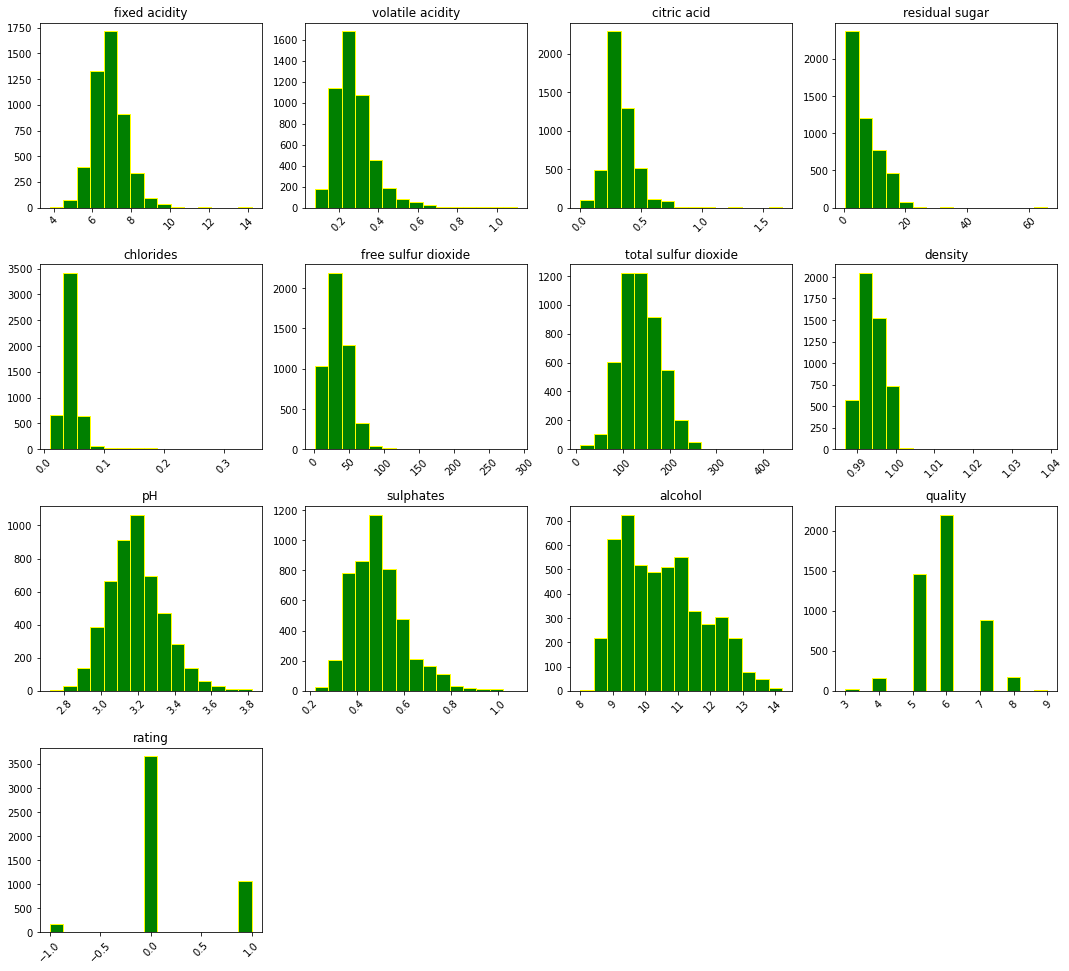

In [257]:
fig = white.hist(bins=15, color='green', edgecolor='yellow', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

<AxesSubplot:xlabel='rating', ylabel='alcohol'>

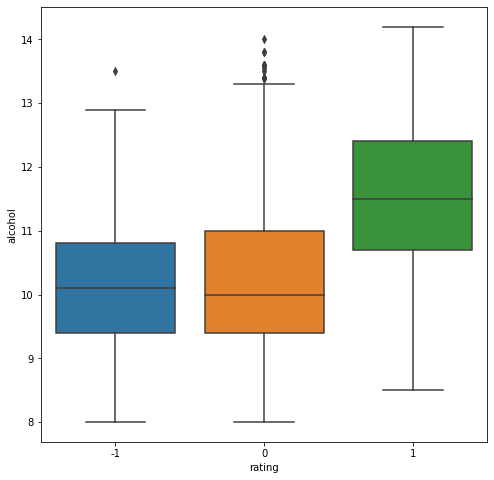

In [215]:
plt.figure(figsize = (8,8))
sb.boxplot(x='rating', y='alcohol', data = white)

<AxesSubplot:xlabel='rating', ylabel='pH'>

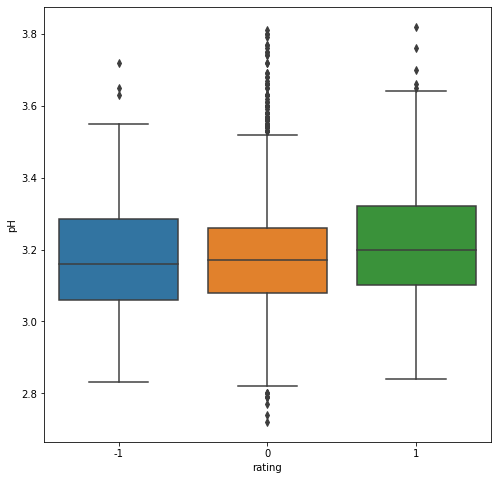

In [216]:
plt.figure(figsize = (8,8))
sb.boxplot(x='rating', y='pH', data = white)

## Now doing some predictive analysis to judge the quality of wine given the same feature set

In [234]:
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [232]:
x = white[white.columns[:-1]]
y = white['rating']
sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

In [247]:
score = []

In [248]:
KNN3= KNeighborsClassifier(n_neighbors = 3)
KNN3.fit(x_train, y_train)
ypred_KNN3 = KNN3.predict(x_test)
print(classification_report(y_test, ypred_KNN3))
cross_val = cross_val_score(estimator=KNN, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

          -1       0.89      0.41      0.56        39
           0       0.96      0.99      0.98       902
           1       0.99      0.94      0.96       284

    accuracy                           0.96      1225
   macro avg       0.94      0.78      0.83      1225
weighted avg       0.96      0.96      0.96      1225

0.9537184575287287


TypeError: slice indices must be integers or None or have an __index__ method

In [241]:
KNN5 = KNeighborsClassifier(n_neighbors = 5)
KNN5.fit(x_train, y_train)
ypred_KNN5 = KNN5.predict(x_test)
print(classification_report(y_test, ypred_KNN5))
cross_val = cross_val_score(estimator=KNN, X=x_train, y=y_train, cv=12)
print(cross_val.mean())

              precision    recall  f1-score   support

          -1       0.94      0.44      0.60        39
           0       0.95      0.99      0.97       902
           1       0.98      0.91      0.94       284

    accuracy                           0.96      1225
   macro avg       0.96      0.78      0.84      1225
weighted avg       0.96      0.96      0.95      1225

0.9523597893735851


In [242]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        39
           0       1.00      1.00      1.00       902
           1       1.00      1.00      1.00       284

    accuracy                           1.00      1225
   macro avg       1.00      1.00      1.00      1225
weighted avg       1.00      1.00      1.00      1225

1.0


In [243]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        39
           0       1.00      1.00      1.00       902
           1       1.00      1.00      1.00       284

    accuracy                           1.00      1225
   macro avg       1.00      1.00      1.00      1225
weighted avg       1.00      1.00      1.00      1225

1.0


In [249]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
print(classification_report(y_test, pred_LR))
cross_val = cross_val_score(estimator=LR, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        39
           0       1.00      1.00      1.00       902
           1       1.00      1.00      1.00       284

    accuracy                           1.00      1225
   macro avg       1.00      1.00      1.00      1225
weighted avg       1.00      1.00      1.00      1225

1.0


In [251]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
pred_GB = GB.predict(x_test)
print(classification_report(y_test, pred_GB))
cross_val = cross_val_score(estimator=GB, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        39
           0       1.00      1.00      1.00       902
           1       1.00      1.00      1.00       284

    accuracy                           1.00      1225
   macro avg       1.00      1.00      1.00      1225
weighted avg       1.00      1.00      1.00      1225

1.0


In [252]:
lsvc = LinearSVC()
lsvc.fit(x_train, y_train)
pred_lsvc = lsvc.predict(x_test)
print(classification_report(y_test, pred_lsvc))
cross_val = cross_val_score(estimator=lsvc, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

C:\Users\Samriddh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

          -1       1.00      0.21      0.34        39
           0       0.97      1.00      0.98       902
           1       1.00      1.00      1.00       284

    accuracy                           0.97      1225
   macro avg       0.99      0.74      0.77      1225
weighted avg       0.98      0.97      0.97      1225



C:\Users\Samriddh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Samriddh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Samriddh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Samriddh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Samriddh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.9686929866129604


C:\Users\Samriddh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
